In [1]:
!pip install pyav

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 9.7 MB/s eta 0:00:00


In [4]:
!pip install ffmpeg-python

In [3]:
import av

# Initialize the container and counters
container = av.open("/content/3150419-uhd_3840_2160_30fps.mp4")
total_frames = 0
frame_types = {'I': 0, 'P': 0, 'B': 0}

# Iterate through the frames and count them by type
for frame in container.decode(video=0):
    total_frames += 1
    frame_types[frame.pict_type.name] += 1

# Close the container
container.close()

print(f"Total frames: {total_frames}")
print(f"Frame types: {frame_types}")

Total frames: 392
Frame types: {'I': 5, 'P': 100, 'B': 287}


In [6]:
import ffmpeg

def extract_frames_info(video_path):
    try:
        probe = ffmpeg.probe(video_path)
        video_streams = [stream for stream in probe['streams'] if stream['codec_type'] == 'video']

        if not video_streams:
            raise ValueError("No video stream found")

        video_stream = video_streams[0]

        width = video_stream['width']
        height = video_stream['height']
        frame_rate = eval(video_stream['r_frame_rate'])
        duration = float(video_stream['duration'])
        total_frames = int(video_stream['nb_frames'])

        print(f"Width: {width}")
        print(f"Height: {height}")
        print(f"Frame Rate: {frame_rate}")
        print(f"Duration: {duration} seconds")
        print(f"Total Frames: {total_frames}")

        return {
            'width': width,
            'height': height,
            'frame_rate': frame_rate,
            'duration': duration,
            'total_frames': total_frames
        }

    except ffmpeg.Error as e:
        print(f"Error occurred: {e.stderr.decode()}")
        return None

# Replace 'sample_video.mp4' with the path to your video file
video_info = extract_frames_info("/content/3150419-uhd_3840_2160_30fps.mp4")


Width: 3840
Height: 2160
Frame Rate: 29.97002997002997
Duration: 13.079733 seconds
Total Frames: 392


In [7]:
!pip3 install psubprocess


ERROR: Could not find a version that satisfies the requirement psubprocess (from versions: none)
ERROR: No matching distribution found for psubprocess


Frame Type Distribution:
I Frames: Count = 5, Percentage = 1.28%
P Frames: Count = 100, Percentage = 25.51%
B Frames: Count = 287, Percentage = 73.21%


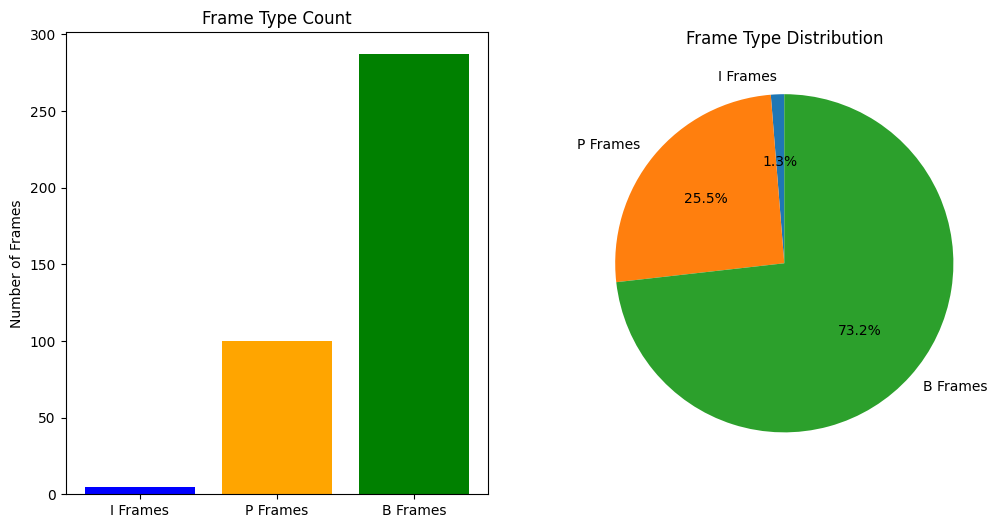

In [8]:
import av
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    # Initialize counters
    total_frames = 0
    frame_types = {'I': 0, 'P': 0, 'B': 0}

    # Open the video container
    container = av.open(video_path)

    # Iterate through frames in the video
    for frame in container.decode(video=0):
        total_frames += 1
        frame_types[frame.pict_type.name] += 1

    return frame_types, total_frames

def plot_frame_distribution(frame_counts, total_frames):
    frame_types = ['I Frames', 'P Frames', 'B Frames']
    counts = [frame_counts.get('I', 0), frame_counts.get('P', 0), frame_counts.get('B', 0)]

    # Check if total frames is greater than zero to plot
    if total_frames > 0:
        percentages = [(count / total_frames) * 100 for count in counts]

        # Print counts and percentages for each frame type
        print("Frame Type Distribution:")
        for frame_type, count, percentage in zip(frame_types, counts, percentages):
            print(f"{frame_type}: Count = {count}, Percentage = {percentage:.2f}%")

        # Bar graph
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.bar(frame_types, counts, color=['blue', 'orange', 'green'])
        plt.title('Frame Type Count')
        plt.ylabel('Number of Frames')

        # Pie chart
        plt.subplot(1, 2, 2)
        plt.pie(percentages, labels=frame_types, autopct='%1.1f%%', startangle=90)
        plt.title('Frame Type Distribution')

        plt.show()
    else:
        print("No frames found in the video.")

def main(video_path):
    frame_counts, total_frames = analyze_frame_types(video_path)
    plot_frame_distribution(frame_counts, total_frames)

# Replace 'your_video.mp4' with the path to your video file
if __name__ == "__main__":
    video_path = "/content/3150419-uhd_3840_2160_30fps.mp4"  # Update with your video path
    main(video_path)


In [9]:
!pip install Pillow


In [10]:
from PIL import Image
import os

def display_frames(frame_type):
    # Get a list of all extracted frames
    frame_files = sorted([f for f in os.listdir() if f.startswith(frame_type) and f.endswith('.png')])

    for frame_file in frame_files:
        # Open the image file
        with Image.open(frame_file) as img:
            img.show()  # Display the image
            input("Press Enter to continue to the next frame...")  # Wait for user input

def main():
    # Display I frames
    print("Displaying I Frames:")
    display_frames('i_frame_')

    # Display P frames
    print("Displaying P Frames:")
    display_frames('p_frame_')

    # Display B frames
    print("Displaying B Frames:")
    display_frames('b_frame_')

if __name__ == "__main__":
    main()


Displaying I Frames:
Displaying P Frames:
Displaying B Frames:


In [ ]:
import av
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Open the video file
container = av.open("/content/3150419-uhd_3840_2160_30fps.mp4")

# Initialize counters for each frame type
frame_counts = {'I': 0, 'P': 0, 'B': 0}

# Initialize dictionaries to store frames
frames_to_display = {'I': [], 'P': [], 'B': []}

# Loop through frames in the video
for frame in container.decode(video=0):
    # Get the frame type
    frame_type = frame.pict_type.name

    # Check if we already have 2 frames of this type
    if frame_counts[frame_type] < 2:
        # Convert frame to a numpy array (OpenCV image)
        frame_image = frame.to_image()
        frame_array = np.array(frame_image)

        # Store the frame
        frames_to_display[frame_type].append(frame_array)

        # Update the count for this frame type
        frame_counts[frame_type] += 1

    # Check if we have collected enough frames of all types
    if all(count >= 2 for count in frame_counts.values()):
        break

# Function to display frames using OpenCV
def display_frames(frames, frame_type):
    for i, frame in enumerate(frames):
        # Convert RGB to BGR for OpenCV
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Display the frame
        cv2_imshow(frame_bgr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Display the frames
for frame_type in ['I', 'P', 'B']:
    display_frames(frames_to_display[frame_type], frame_type)


In [15]:
# Extract I frames
!ffmpeg -i 3150419-uhd_3840_2160_30fps.mp4 -vf "select='eq(pict_type\,I)'" -vsync vfr -frame_pts true I_frame_%04d.png

# Extract P frames
!ffmpeg -i 3150419-uhd_3840_2160_30fps.mp4 -vf "select='eq(pict_type\,P)'" -vsync vfr -frame_pts true P_frame_%04d.png

# Extract B frames
!ffmpeg -i 3150419-uhd_3840_2160_30fps.mp4 -vf "select='eq(pict_type\,B)'" -vsync vfr -frame_pts true B_frame_%04d.png


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [16]:
import os
import glob

def calculate_average_frame_size(frame_type):
    frame_files = glob.glob(f'{frame_type}_frame_*.png')
    total_size = sum(os.path.getsize(frame) for frame in frame_files)
    average_size = total_size / len(frame_files) if frame_files else 0
    print(f"Total size of all {frame_type} frames: {total_size} KB")
    return average_size

average_size_I = calculate_average_frame_size('I')
average_size_P = calculate_average_frame_size('P')
average_size_B = calculate_average_frame_size('B')

print(f"Average size of I frames: {average_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {average_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {average_size_B / 1024:.2f} KB")



Total size of all I frames: 31871826 KB
Total size of all P frames: 647080877 KB
Total size of all B frames: 1905336815 KB
Average size of I frames: 6224.97 KB
Average size of P frames: 6319.15 KB
Average size of B frames: 6483.21 KB


In [18]:
import os
import glob
import subprocess

def extract_frames(video_path, frame_type):
    frame_pattern = f'{frame_type}_frame_%04d.png'
    if frame_type == 'I':
        subprocess.run(['ffmpeg', '-i', video_path, '-vf', "select='eq(pict_type,I)'", '-vsync', 'vfr', '-frame_pts', 'true', frame_pattern])
    elif frame_type == 'P':
        subprocess.run(['ffmpeg', '-i', video_path, '-vf', "select='eq(pict_type,P)'", '-vsync', 'vfr', '-frame_pts', 'true', frame_pattern])
    elif frame_type == 'B':
        subprocess.run(['ffmpeg', '-i', video_path, '-vf', "select='eq(pict_type,B)'", '-vsync', 'vfr', '-frame_pts', 'true', frame_pattern])

def calculate_average_frame_size(frame_type):
    frame_files = glob.glob(f'{frame_type}_frame_*.png')
    total_size = sum(os.path.getsize(frame) for frame in frame_files)
    average_size = total_size / len(frame_files) if frame_files else 0
    return average_size

video_path = "3150419-uhd_3840_2160_30fps.mp4"
extract_frames(video_path, 'I')
extract_frames(video_path, 'P')
extract_frames(video_path, 'B')

average_size_I = calculate_average_frame_size('I')
average_size_P = calculate_average_frame_size('P')
average_size_B = calculate_average_frame_size('B')

print(f"Average size of I frames: {average_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {average_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {average_size_B / 1024:.2f} KB")



Average size of I frames: 6224.97 KB
Average size of P frames: 6319.15 KB
Average size of B frames: 6483.21 KB


In [20]:
import subprocess
import os

def extract_i_frames(video_path, output_dir):
    try:
        # Ensure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # Define the ffmpeg command to extract I-frames
        cmd = [
            'ffmpeg',
            '-i', video_path,
            '-vf', 'select=eq(pict_type\\,I)',
            '-vsync', 'vfr',
            f'{output_dir}/frame_%04d.png'
        ]

        # Run the command
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"I-frames extracted successfully to {output_dir}")

    except Exception as e:
        print(f"Error extracting I-frames: {str(e)}")

# Example usage
video_path = "3150419-uhd_3840_2160_30fps.mp4"  # Replace with the correct path
i_frames_dir = 'I_frames'  # Directory to save I-frames

extract_i_frames(video_path, i_frames_dir)


def reconstruct_video_from_i_frames(i_frames_dir, output_video_path, frame_rate=1):
    try:
        # Define the ffmpeg command to reconstruct the video
        cmd = [
            'ffmpeg',
            '-framerate', str(frame_rate),  # Set the frame rate
            '-i', os.path.join(i_frames_dir, 'frame_%04d.png'),
            '-c:v', 'libx264',  # Use H.264 codec
            '-pix_fmt', 'yuv420p',
            output_video_path
        ]

        # Run the command
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"Video reconstructed successfully and saved to {output_video_path}")

    except Exception as e:
        print(f"Error reconstructing video: {str(e)}")

# Example usage
output_video_path = 'reconstruct_video.mp4'  # Path to save the reconstructed video
reconstruct_video_from_i_frames(i_frames_dir, output_video_path,frame_rate=1)

I-frames extracted successfully to I_frames
Video reconstructed successfully and saved to reconstruct_video.mp4


In [ ]:
from IPython.display import Video

# Display the reconstructed video
Video('reconstruct_video.mp4', embed=True)